# Классификация изображений природы по времени года

**Проектная работа Ситникова Андрея на курсе «Machine Learning. Professional»**

## Часть 2. Выделение палитры

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from tqdm import tqdm
from IPython.display import HTML, display

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(100)

Для обработки изображения воспользуемся библиотекой PIL.

Сначала попробуем загрузить одну картинку, считать информацию о каждом пикселе и составить датафрейм с координатами пикселей (*x*, *y*) и их цветами (*r*, *g*, *b*).

In [2]:
with Image.open('img/summer/1536088.jpg') as im:
    px = im.load()
arr = []
# Пробегаем вложенным циклом по двум измерениям картинки
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = px[i,j]
        arr.append([i, j, r, g, b])
df = pd.DataFrame(arr, columns=['x', 'y', 'r', 'g', 'b'])
df

,x,y,r,g,b
0,0,0,2,77,220
1,0,1,2,77,220
2,0,2,2,77,220
3,0,3,2,77,220
4,0,4,2,77,220
...,...,...,...,...,...
268155,639,414,95,178,254
268156,639,415,95,178,254
268157,639,416,92,178,255
268158,639,417,92,178,255


Вот наша картинка.

![Image](img/summer/1536088.jpg)

В палитре данной картинки ожидаем увидеть жёлтый, синий, зелёный и какой-нибудь тёмный цвет.

### Кластеризация

**Гипотеза**: если в датафрейме на основе картинки выделить несколько кластеров и получить значения их центров, это и будут искомые цвета палитры.

Нужно найти оптимальное число кластеров.

Также нужно ответить на вопрос, стоит ли учитывать координаты пикселей для кластеризации или отбросить их.

Воспользуемся алгоритмом KMeans и построим график зависимости критерия инерции (функции потерь) от числа кластеров.

100%|██████████| 14/14 [01:25<00:00,  6.12s/it]


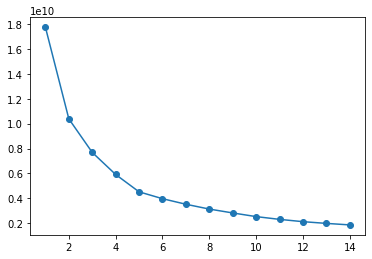

In [3]:
inertia = []
for i in tqdm(range(1,15)):
    kmeans = KMeans(n_clusters=i, n_jobs=-1, random_state=100).fit(df)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)
plt.plot(range(1,15), inertia, marker='o');

Очевидного локтя нет, построим график переломного момента.

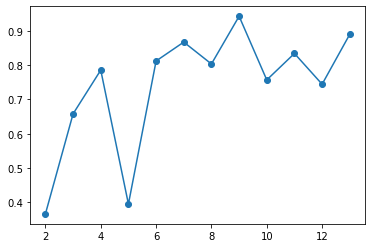

In [4]:
D = []
for i in range(1,13):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)
plt.plot(range(2,14), D, marker='o');

Как видно из графика, прежде всего целесообразно рассмотреть число кластеров 2 и 5.

Снова настроим алгоритм KMeans с 2 кластерами и выведем получившиеся центры.

In [5]:
kmeans = KMeans(n_clusters=2, n_jobs=-1, random_state=100).fit(df)
centers = kmeans.cluster_centers_
centers = np.around(centers, decimals=0)
centers_df = pd.DataFrame(centers, columns=['x', 'y', 'r', 'g', 'b'])
centers_df

,x,y,r,g,b
0,188.0,215.0,116.0,142.0,138.0
1,502.0,201.0,39.0,117.0,225.0


А какие цвета у точек с этими координатами?

In [6]:
px[188,215]

(41, 57, 20)

In [7]:
px[502,201]

(31, 123, 250)

Отобразим нашу палитру.

In [8]:
html = ''
for center in centers:
    R, G, B = center[2:5]
    html += f'<div style="float: left; width: 50px; height: 50px; background-color: rgb({R}, {G}, {B}); border: 1px solid black; margin-right: 1px"></div>'
display(HTML(html))

Отобразим координаты центров на самой картинке.

In [9]:
html = f'<div style="width: {im.size[0]}px; height: {im.size[1]}px">'
html += '<img src="img/summer/1536088.jpg" style="position: absolute">'
for center in centers:
    X, Y, R, G, B = center
    html += f'<div style="position: absolute; width: 15px; height: 15px; border: 2px solid white; left: {X-10}px; top: {Y-10}px; background-color: rgb({R}, {G}, {B})"></div>'
html += '</div>'
display(HTML(html))

Как видно, 2 кластера недостаточно. Повторим всё то же для 5 кластеров.

In [10]:
kmeans = KMeans(n_clusters=5, n_jobs=-1, random_state=100).fit(df)
centers = kmeans.cluster_centers_
centers = np.around(centers, decimals=0)
centers_df = pd.DataFrame(centers, columns=['x', 'y', 'r', 'g', 'b'])
centers_df

,x,y,r,g,b
0,294.0,203.0,168.0,139.0,28.0
1,502.0,102.0,5.0,88.0,229.0
2,122.0,305.0,120.0,171.0,191.0
3,500.0,331.0,82.0,156.0,230.0
4,123.0,70.0,17.0,93.0,229.0


In [11]:
html = ''
for center in centers:
    R, G, B = center[2:5]
    html += f'<div style="float: left; width: 50px; height: 50px; background-color: rgb({R}, {G}, {B}); border: 1px solid black; margin-right: 1px"></div>'
display(HTML(html))

In [12]:
html = f'<div style="width: {im.size[0]}px; height: {im.size[1]}px">'
html += '<img src="img/summer/1536088.jpg" style="position: absolute">'
for center in centers:
    X, Y, R, G, B = center
    html += f'<div style="position: absolute; width: 15px; height: 15px; border: 2px solid white; left: {X-10}px; top: {Y-10}px; background-color: rgb({R}, {G}, {B})"></div>'
html += '</div>'
display(HTML(html))

Результат по-прежнему неудовлетворительный. Попробуем взять 10 кластеров.

In [13]:
kmeans = KMeans(n_clusters=10, n_jobs=-1, random_state=100).fit(df)
centers = kmeans.cluster_centers_
centers = np.around(centers, decimals=0)
centers_df = pd.DataFrame(centers, columns=['x', 'y', 'r', 'g', 'b'])
centers_df

,x,y,r,g,b
0,551.0,116.0,5.0,88.0,230.0
1,149.0,375.0,143.0,176.0,116.0
2,280.0,262.0,78.0,52.0,25.0
3,355.0,370.0,108.0,178.0,243.0
4,216.0,136.0,193.0,168.0,32.0
5,383.0,242.0,201.0,183.0,38.0
6,89.0,270.0,104.0,165.0,241.0
7,378.0,60.0,6.0,86.0,227.0
8,98.0,70.0,14.0,92.0,230.0
9,543.0,312.0,68.0,146.0,241.0


In [14]:
html = ''
for center in centers:
    R, G, B = center[2:5]
    html += f'<div style="float: left; width: 50px; height: 50px; background-color: rgb({R}, {G}, {B}); border: 1px solid black; margin-right: 1px"></div>'
display(HTML(html))

In [15]:
html = f'<div style="width: {im.size[0]}px; height: {im.size[1]}px">'
html += '<img src="img/summer/1536088.jpg" style="position: absolute">'
for center in centers:
    X, Y, R, G, B = center
    html += f'<div style="position: absolute; width: 15px; height: 15px; border: 2px solid white; left: {X-10}px; top: {Y-10}px; background-color: rgb({R}, {G}, {B})"></div>'
html += '</div>'
display(HTML(html))

Что ж, уже лучше. Попробуем избавиться от координат.

In [16]:
df_noxy = df[['r', 'g', 'b']]
df_noxy

,r,g,b
0,2,77,220
1,2,77,220
2,2,77,220
3,2,77,220
4,2,77,220
...,...,...,...
268155,95,178,254
268156,95,178,254
268157,92,178,255
268158,92,178,255


Посчитаем KMeans для усечённого датасета с 5 кластерами.

In [17]:
kmeans = KMeans(n_clusters=5, n_jobs=-1, random_state=100).fit(df_noxy)
centers = kmeans.cluster_centers_
centers = np.around(centers, decimals=0)
centers_df = pd.DataFrame(centers, columns=['r', 'g', 'b'])
centers_df

,r,g,b
0,86.0,69.0,28.0
1,11.0,93.0,232.0
2,197.0,177.0,29.0
3,168.0,199.0,153.0
4,96.0,166.0,249.0


In [18]:
html = ''
for center in centers:
    R, G, B = center
    html += f'<div style="float: left; width: 50px; height: 50px; background-color: rgb({R}, {G}, {B}); border: 1px solid black; margin-right: 1px"></div>'
display(HTML(html))

Чисто визуально палитра смотрится лучше. Повторим для 10 кластеров.

In [19]:
kmeans = KMeans(n_clusters=10, n_jobs=-1, random_state=100).fit(df_noxy)
centers = kmeans.cluster_centers_
centers = np.around(centers, decimals=0)
centers_df = pd.DataFrame(centers, columns=['r', 'g', 'b'])
centers_df

,r,g,b
0,131.0,191.0,246.0
1,4.0,86.0,228.0
2,172.0,109.0,11.0
3,126.0,157.0,60.0
4,62.0,46.0,25.0
5,41.0,121.0,246.0
6,214.0,175.0,12.0
7,171.0,203.0,154.0
8,245.0,236.0,49.0
9,88.0,160.0,250.0


In [20]:
html = ''
for center in centers:
    R, G, B = center
    html += f'<div style="float: left; width: 50px; height: 50px; background-color: rgb({R}, {G}, {B}); border: 1px solid black; margin-right: 1px"></div>'
display(HTML(html))

Пожалуй, для 10 кластеров и без учёта координат пикселей самый приемлемый результат. Возьмём эти параметры как основные для дальнейшей работы, но при недостаточном качестве обучения моделей нужно будет подумать, что поменять.

### Усечение цветовой гаммы

Выявленные в картинках цвета должны служить признаками для обучения итоговой модели. В RGB-модели общее число цветов — 16 777 216, что слишком много. Попробуем оставить только 6 вариантов каждого цвета, тогда у нас получится 6×6×6 = 216 признаков (это так называемая Web Safe Colors палитра).

In [21]:
# Функция приводит компоненту цвета к ближайшему safe-значению
def get_safe_color(color):
    return int(round((color / 255) * 5) * 51)

# Векторизуем функцию для применения к numpy-массивам
get_safe_color_vec = np.vectorize(get_safe_color)

In [22]:
centers_safe = get_safe_color_vec(centers)
centers_df = pd.DataFrame(centers_safe, columns=['r', 'g', 'b'])
centers_df

,r,g,b
0,153,204,255
1,0,102,204
2,153,102,0
3,102,153,51
4,51,51,0
5,51,102,255
6,204,153,0
7,153,204,153
8,255,255,51
9,102,153,255


In [23]:
html = ''
for center in centers_safe:
    R, G, B = center
    html += f'<div style="float: left; width: 50px; height: 50px; background-color: rgb({R}, {G}, {B}); border: 1px solid black; margin-right: 1px"></div>'
display(HTML(html))

Мы получили 10 цветов картинки, которые теперь входят в множество безопасной палитры из 216 цветов. Визуально от прошлого варианта ряд почти не отличается.

Протестируем полученный алгоритм на нескольких картинках. Добавим удаление повторяющихся цветов в палитре одной картинки.

In [24]:
import os

# Считываем файлы из папки
files = os.listdir('img/summer')
files = files[:10]
for file in tqdm(files):
    # Загружаем картинку, создаём датафрейм из пикселей
    with Image.open(f"img/summer/{file}") as im:
        px = im.load()
    arr = []
    for i in range(im.size[0]):
        for j in range(im.size[1]):
            r, g, b = px[i,j]
            arr.append([r, g, b])
    df = pd.DataFrame(arr, columns=['r', 'g', 'b'])
    # Делаем кластеризацию
    kmeans = KMeans(n_clusters=10, n_jobs=-1).fit(df)
    centers = kmeans.cluster_centers_
    # Приводим цвета к безопасной гамме, удаляем повторы
    centers = get_safe_color_vec(centers)
    centers = np.unique(centers, axis=0)
    # Выводим картинку и цветовую гамму.
    html = '<div>'
    html += f"'<img src='img/summer/{file}' style='float: left; width: 20%; height: 20%; margin-right: 1px'>"
    for center in centers:
        R, G, B = center
        html += f"<div style='float: left; width: 50px; height: 50px; background-color: rgb({R}, {G}, {B}); border: 1px solid black; margin-right: 1px'></div>"
    html += '</div>'
    display(HTML(html))

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:12<01:50, 12.30s/it]

 20%|██        | 2/10 [00:21<01:31, 11.40s/it]

 30%|███       | 3/10 [00:34<01:22, 11.85s/it]

 40%|████      | 4/10 [00:45<01:09, 11.58s/it]

 50%|█████     | 5/10 [00:56<00:57, 11.48s/it]

 60%|██████    | 6/10 [01:05<00:42, 10.57s/it]

 70%|███████   | 7/10 [01:16<00:32, 10.70s/it]

 80%|████████  | 8/10 [01:26<00:21, 10.71s/it]

 90%|█████████ | 9/10 [01:37<00:10, 10.75s/it]

100%|██████████| 10/10 [01:42<00:00, 10.22s/it]
